# Extracting Audio Features

In this notebook, we will explore various techniques for extracting features from audio data. These features are essential for tasks such as audio classification, music genre recognition, and speech recognition. The features we will cover include Zero Crossing Rate (ZCR), Spectral Centroid, Mel-Frequency Cepstral Coefficients (MFCC), Spectral Rolloff, and other features such as Chroma Features and Tonnetz.

## 1. Zero Crossing Rate (ZCR)

The Zero Crossing Rate (ZCR) is the rate at which the signal changes from positive to negative or vice versa. It is a measure of the noisiness of the signal and is commonly used in speech and music analysis. High ZCR values indicate noisy or percussive sounds, whereas low ZCR values are typical for harmonic and tonal sounds.

- **Why it is useful**: ZCR is useful for distinguishing between voiced and unvoiced speech segments in speech processing. It can also be used to identify percussive elements in music.
- **Calculation**: It is calculated by counting the number of times the signal crosses the horizontal axis (zero amplitude) in a given time frame.

## 2. Spectral Centroid

The Spectral Centroid indicates where the center of mass of the spectrum is located. It is often perceived as the brightness of a sound and is used in timbre analysis. Higher spectral centroid values correspond to brighter sounds (e.g., cymbals), while lower values correspond to darker sounds (e.g., bass).

- **Why it is useful**: Spectral Centroid is useful in distinguishing between different types of sounds based on their perceived brightness. It can be used in genre classification, instrument recognition, and timbre analysis.
- **Calculation**: It is calculated as the weighted mean of the frequencies present in the signal, with their magnitudes as weights.

## 3. Mel-Frequency Cepstral Coefficients (MFCC)

Mel-Frequency Cepstral Coefficients (MFCC) are a set of features that represent the short-term power spectrum of a sound. They are widely used in speech and audio processing due to their ability to represent the timbral texture of an audio signal.

- **Why it is useful**: MFCCs are robust to variations in pitch and loudness, making them ideal for tasks like speech recognition and speaker identification. They capture the essential characteristics of the audio signal in a compact form.
- **Calculation**: MFCCs are computed by applying a Fourier Transform to the signal, mapping the power spectrum to the Mel scale, taking the logarithm, and then applying the Discrete Cosine Transform (DCT).

## 4. Spectral Rolloff

The Spectral Rolloff is the frequency below which a specified percentage of the total spectral energy lies. It is used to distinguish between harmonic content and noise in the audio signal.

- **Why it is useful**: Spectral Rolloff can be used to identify the point where the energy in the higher frequencies drops off. This is useful in distinguishing between different types of sounds, such as separating speech from music or identifying the presence of high-frequency noise.
- **Calculation**: It is calculated by finding the frequency below which a certain percentage (typically 85%) of the total spectral energy is contained.

## 5. Other Features

- **Chroma Features**: Represent the energy distribution of the 12 different pitch classes (chroma) in music. They are useful for analyzing harmony and chords.
  - **Why it is useful**: Chroma features capture the harmonic content of music and can be used for tasks such as chord recognition, key detection, and music similarity analysis.
  - **Calculation**: It is calculated by mapping the short-time Fourier transform (STFT) to 12 bins corresponding to the 12 pitch classes.

- **Tonnetz**: Represents the tonal space of music, capturing relationships between pitches, chords, and keys. Useful for harmonic and tonal analysis.
  - **Why it is useful**: Tonnetz features are useful for understanding the harmonic structure and tonal relationships in music. They can be used for tasks such as chord progression analysis and music genre classification.
  - **Calculation**: It is derived from the chroma features and captures the harmonic relations between notes in a geometric representation.


In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Load sample audio file
y, sr = librosa.load('in_the_Parisian_Metro.wav')

In [2]:
# Calculate Zero Crossing Rate
zcr = librosa.feature.zero_crossing_rate(y)
print(f"Zero Crossing Rate: {zcr.mean()}")

Zero Crossing Rate: 0.028319831908218504


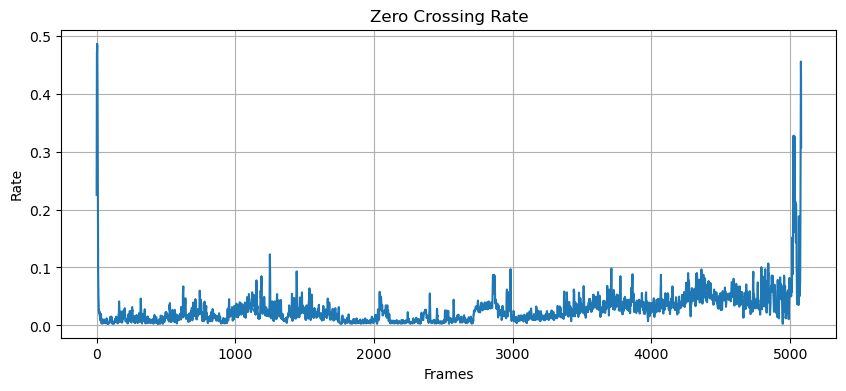

In [3]:
# Plot Zero Crossing Rate
plt.figure(figsize=(10, 4))
plt.plot(zcr[0])
plt.title('Zero Crossing Rate')
plt.xlabel('Frames')
plt.ylabel('Rate')
plt.grid()
plt.show()

### Interpretation of Zero Crossing Rate (ZCR)

**Zero Crossing Rate (ZCR)**:
- **Average ZCR value**: 0.028319831908218504
- **Plot**: The curve shows the rate at which the audio signal crosses the zero amplitude line over time.

**Interpretation**:
- The average ZCR value of 0.0283 indicates that, on average, the audio signal crosses the zero line about 2.83% of the time per unit of measurement (frame).
- **Segments with high ZCR**: The high peaks at the beginning and end of the plot indicate segments of the signal with more noise or percussive elements. This means there are more transitions between positive and negative values, typical of noisy or abrupt sounds.
- **Segments with low ZCR**: Sections where the ZCR is low, particularly in the middle of the plot, indicate segments with more harmonic content. This suggests that these portions of the signal contain more continuous or tonal sounds, with fewer rapid transitions between positive and negative values.

In summary, the audio signal contains sections with variability in terms of noisiness, with distinct segments having different characteristics in terms of ZCR.


In [4]:
# Calculate Spectral Centroid
spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
print(f"Spectral Centroid: {spectral_centroid.mean()}")

Spectral Centroid: 1395.045941703737


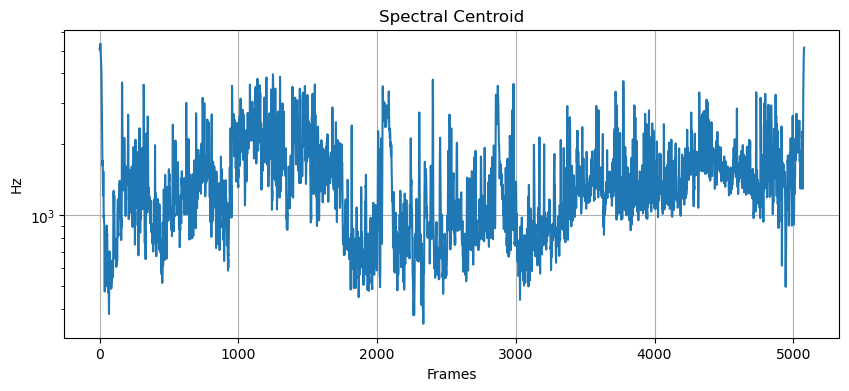

In [5]:
# Plot Spectral Centroid
plt.figure(figsize=(10, 4))
plt.semilogy(spectral_centroid.T, label='Spectral Centroid')
plt.xlabel('Frames')
plt.ylabel('Hz')
plt.title('Spectral Centroid')
plt.grid()
plt.show()

### Interpretation of Spectral Centroid

**Spectral Centroid**:
- **Average Spectral Centroid value**: 1395.045941703737 Hz
- **Plot**: The curve shows the spectral centroid over time, indicating where the center of mass of the spectrum is located.

**Interpretation**:
- The average spectral centroid value of approximately 1395 Hz suggests that the audio signal has a relatively bright timbre, as higher spectral centroid values are associated with brighter sounds.
- **High spectral centroid values**: Segments with higher spectral centroid values indicate portions of the audio signal with more high-frequency content. These segments are often perceived as brighter and may contain instruments or sounds with higher pitches, such as cymbals or high-pitched vocals.
- **Low spectral centroid values**: Segments with lower spectral centroid values indicate portions of the audio signal with more low-frequency content. These segments are perceived as darker and may contain instruments or sounds with lower pitches, such as bass instruments or low-pitched vocals.

In summary, the spectral centroid plot indicates that the audio signal has varying brightness over time, with segments that contain both high and low-frequency content. The average value suggests a tendency towards a brighter overall sound.


In [6]:
# Calculate MFCC
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
print(f"MFCC: {mfcc.mean(axis=1)}")

MFCC: [-344.1939     112.175       29.656893    27.470713    15.877821
   12.752499     7.4295535    6.5447264    3.894572     5.5574117
    2.7541409    4.7102103    2.1184533]


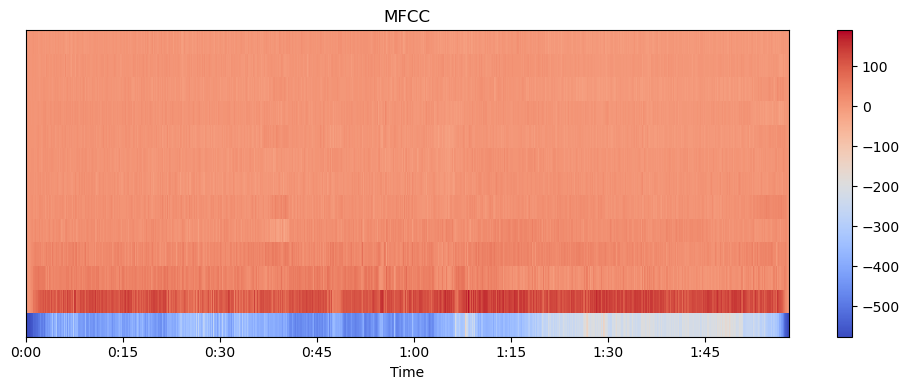

In [7]:
# Plot MFCC
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

### Interpretation of Mel-Frequency Cepstral Coefficients (MFCC)

**MFCC**:
- **Average MFCC values**:
  - MFCC[0]: -344.1939
  - MFCC[1]: 112.175
  - MFCC[2]: 29.656893
  - MFCC[3]: 27.470713
  - MFCC[4]: 15.877821
  - MFCC[5]: 12.752499
  - MFCC[6]: 7.4295535
  - MFCC[7]: 6.5447264
  - MFCC[8]: 3.894572
  - MFCC[9]: 5.5574117
  - MFCC[10]: 2.7541409
  - MFCC[11]: 4.7102103
  - MFCC[12]: 2.1184533

**Plot**: The MFCC plot shows the Mel-Frequency Cepstral Coefficients over time, representing the short-term power spectrum of the audio signal.

**Interpretation**:
- **MFCC[0] (First Coefficient)**: This coefficient often represents the overall energy of the signal. A value of -344.1939 indicates the general loudness level of the audio.
- **Higher MFCCs (MFCC[1] to MFCC[12])**: These coefficients capture more detailed aspects of the spectral shape and are critical for identifying the timbral characteristics of the audio. The values range from 112.175 to 2.1184533, showing how different frequency bands contribute to the overall sound.
- **Temporal Variations**: The MFCC plot indicates how these coefficients change over time. The consistent coloring at the top part of the plot suggests stable spectral characteristics, while variations in color indicate changes in the timbral texture.

In summary, the MFCC plot and values provide a detailed representation of the timbral texture of the audio signal. The first coefficient reflects the overall energy, while the higher coefficients capture detailed spectral features that are essential for tasks like speech recognition and audio classification.


In [8]:
# Calculate Spectral Rolloff
spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.85)
print(f"Spectral Rolloff: {spectral_rolloff.mean()}")

Spectral Rolloff: 3231.105875330647


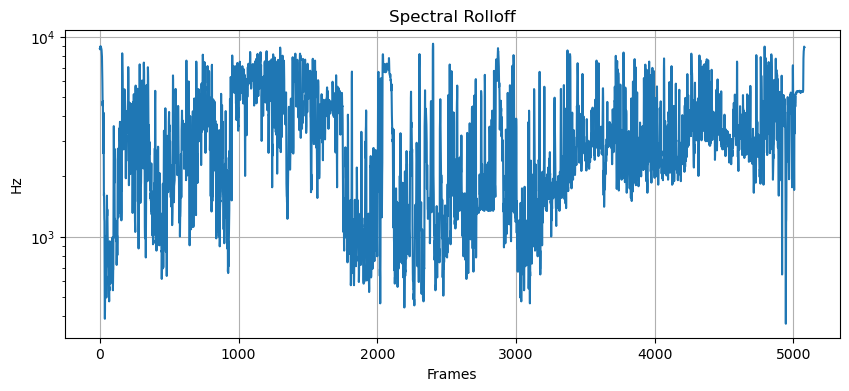

In [9]:
# Plot Spectral Rolloff
plt.figure(figsize=(10, 4))
plt.semilogy(spectral_rolloff.T, label='Spectral Rolloff')
plt.xlabel('Frames')
plt.ylabel('Hz')
plt.title('Spectral Rolloff')
plt.grid()
plt.show()

### Interpretation of Spectral Rolloff

**Spectral Rolloff**:
- **Average Spectral Rolloff value**: 3231.105875330647 Hz
- **Plot**: The curve shows the spectral rolloff over time, indicating the frequency below which a specified percentage (85%) of the total spectral energy lies.

**Interpretation**:
- The average spectral rolloff value of approximately 3231 Hz suggests that a significant portion of the spectral energy is concentrated below this frequency.
- **High spectral rolloff values**: Segments with higher spectral rolloff values indicate portions of the audio signal with more high-frequency content. These segments are often associated with noisier or brighter sounds, such as cymbals or high-pitched vocals.
- **Low spectral rolloff values**: Segments with lower spectral rolloff values indicate portions of the audio signal with more low-frequency content. These segments are often associated with darker or more harmonic sounds, such as bass instruments or low-pitched vocals.

In summary, the spectral rolloff plot indicates the distribution of spectral energy across the frequency spectrum over time. The average value suggests a balance between high and low-frequency content in the audio signal, with variations indicating changes in the harmonic and noise components.


In [10]:
# Chroma Features
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
print(f"Chroma STFT: {chroma_stft.mean(axis=1)}")

Chroma STFT: [0.5524253  0.60218203 0.64336586 0.6896327  0.7691741  0.79404694
 0.6838043  0.57394135 0.5094603  0.53132343 0.52746755 0.5175085 ]


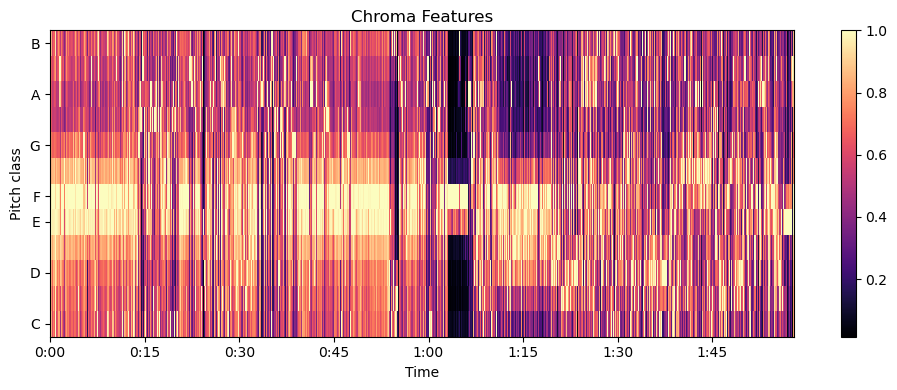

In [11]:
# Plot Chroma Features
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time', sr=sr)
plt.colorbar()
plt.title('Chroma Features')
plt.tight_layout()
plt.show()

### Interpretation of Chroma Features

**Chroma STFT**:
- **Average Chroma STFT values**:
  - C: 0.5524253
  - C#: 0.60218203
  - D: 0.64336586
  - D#: 0.6896327
  - E: 0.7691741
  - F: 0.79404694
  - F#: 0.6838043
  - G: 0.57394135
  - G#: 0.5094603
  - A: 0.53132343
  - A#: 0.52746755
  - B: 0.5175085

**Plot**: The Chroma Features plot shows the distribution of energy across the 12 different pitch classes (chroma) over time.

**Interpretation**:
- **Average Values**: The average values indicate the relative intensity of each pitch class across the entire audio signal. For example, F and E have the highest average values, suggesting these pitch classes are more prominent in the audio.
- **Temporal Patterns**: The plot shows how the intensity of each pitch class varies over time.
  - **Brighter Regions**: Indicate stronger presence of specific pitch classes. For example, there is a prominent presence of F and E throughout much of the audio.
  - **Darker Regions**: Indicate weaker presence of specific pitch classes. Some sections show less intensity for certain pitch classes, suggesting changes in harmonic content or key.

**Applications**:
- **Harmony and Chords**: Chroma features are useful for identifying harmonic content and chords in music. The distribution and transitions of pitch classes can help identify chord progressions and key changes.
- **Music Similarity and Retrieval**: Chroma features can be used to compare and retrieve similar pieces of music based on their harmonic content.

In summary, the Chroma Features plot provides a detailed view of the harmonic structure of the audio signal, highlighting the presence and intensity of different pitch classes over time. The average values suggest a prominence of certain pitch classes, while the temporal patterns indicate changes in harmonic content.


In [12]:
# Tonnetz
tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
print(f"Tonnetz: {tonnetz.mean(axis=1)}")

Tonnetz: [ 0.19812823  0.1218409  -0.02444334 -0.24574364 -0.10019755 -0.05296494]


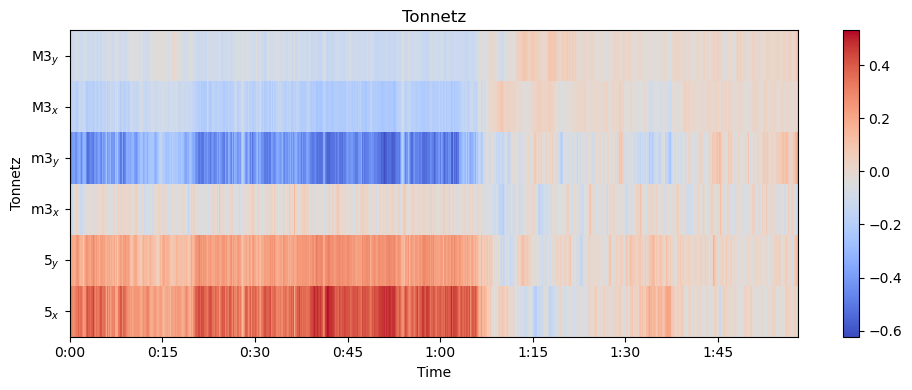

In [13]:
# Plot Tonnetz
plt.figure(figsize=(10, 4))
librosa.display.specshow(tonnetz, y_axis='tonnetz', x_axis='time', sr=sr)
plt.colorbar()
plt.title('Tonnetz')
plt.tight_layout()
plt.show()

### Interpretation of Tonnetz

**Tonnetz**:
- **Average Tonnetz values**:
  - Fifth y: 0.19812823
  - Fifth x: 0.1218409
  - Minor third y: -0.02444334
  - Minor third x: -0.24574364
  - Major third y: -0.10019755
  - Major third x: -0.05296494

**Plot**: The Tonnetz plot shows the tonal relations of the audio signal over time, capturing harmonic relationships between pitches, chords, and keys.

**Interpretation**:
- **Average Values**: The average values provide insight into the overall harmonic structure of the audio signal.
  - **Positive Values**: Indicate the presence of corresponding harmonic intervals (e.g., fifths, thirds).
  - **Negative Values**: Indicate the absence or negative correlation of corresponding harmonic intervals.

**Temporal Patterns**:
- **Brighter Regions (Positive Correlation)**: Indicate stronger presence of specific harmonic intervals.
- **Darker Regions (Negative Correlation)**: Indicate weaker presence or absence of specific harmonic intervals.

**Applications**:
- **Harmonic and Tonal Analysis**: Tonnetz features are useful for analyzing the harmonic and tonal structure of music. They help in identifying chord progressions, key changes, and harmonic relations.
- **Music Similarity and Retrieval**: Tonnetz features can be used to compare and retrieve similar pieces of music based on their harmonic structure.

In summary, the Tonnetz plot provides a detailed view of the harmonic relationships in the audio signal. The average values suggest a prominence or absence of specific harmonic intervals, while the temporal patterns indicate changes in the harmonic structure over time.
